# Laboratorio 4
### Michelle Mejia y Silvia Illescas

## Parte teorica


#### 1. Comparar la simulación de tiempo discreto (síncrona) y de tiempo continuo (asíncrona):

##### a. Describir escenarios donde cada una es preferible.

- **Simulación de tiempo discreto (síncrona):**
  - **Escenario preferible:** Se utiliza cuando el sistema tiene eventos que ocurren en intervalos específicos de tiempo, como en los modelos de colas o en los sistemas de manufactura. Aquí, el tiempo avanza en "saltos" definidos, lo que facilita la simulación de eventos que ocurren en momentos determinados.
  - **Ejemplo:** Un sistema de computadoras en el que las tareas se procesan a intervalos regulares o una simulación de tráfico donde los vehículos se mueven a través de intersecciones a intervalos discretos.

- **Simulación de tiempo continuo (asíncrona):**
  - **Escenario preferible:** Es ideal para sistemas en los que los eventos ocurren de manera continua, como en la simulación de procesos físicos, químicos o biológicos donde los cambios pueden ocurrir en cualquier momento sin un paso fijo de tiempo.
  - **Ejemplo:** Simulación de la dinámica de fluidos, donde las propiedades del fluido cambian de manera continua a medida que pasa el tiempo.

##### b. Analizar las compensaciones computacionales (velocidad vs. precisión).

- **Simulación de tiempo discreto (síncrona):**
  - **Ventaja en velocidad:** Debido a que el tiempo se avanza en "saltos" definidos, es más fácil de implementar computacionalmente. No es necesario hacer cálculos continuos o de interpolación, lo que acelera el proceso de simulación.
  - **Desventaja en precisión:** En este tipo de simulación, el tiempo no es continuo, por lo que la precisión se puede ver afectada, especialmente cuando los eventos suceden entre los pasos de tiempo discretos. Esto puede llevar a una representación menos precisa de ciertos sistemas.
  
- **Simulación de tiempo continuo (asíncrona):**
  - **Ventaja en precisión:** Ofrece una mayor precisión ya que modela el sistema de forma continua. Los cambios en el sistema se pueden representar con más detalle, lo que es útil para procesos físicos o fenómenos que no se ajustan bien a intervalos fijos de tiempo.
  - **Desventaja en velocidad:** Requiere más cálculos, ya que el tiempo es continuo y los eventos deben ser calculados en cada instante. Esto puede hacer que la simulación sea más lenta y que consuma más recursos computacionales.



### 2. Sobre los mecanismos de gestión de eventos:

#### a. Explicar cómo las colas de eventos gestionan los cambios de estado.

Las **colas de eventos** son estructuras de datos que gestionan los eventos que ocurrirán en una simulación de manera ordenada. Cuando un evento ocurre, se coloca en la cola de eventos, y se procesa en el orden en que se encuentra. Cada evento en la cola tiene una **marca de tiempo** que indica el instante en el que debe ocurrir.

- **Cómo gestionan los cambios de estado:** Cuando un evento es procesado, puede provocar un cambio en el estado del sistema. Por ejemplo, si un evento es la llegada de un cliente a un sistema de colas, el estado del sistema (como el número de clientes en espera) se actualiza. Tras procesar este evento, el simulador consulta la cola de eventos para ver cuál es el próximo evento programado y repite el proceso.

#### b. Analizar la gestión de prioridades para eventos concurrentes.

Cuando hay **eventos concurrentes** (es decir, eventos que ocurren en el mismo tiempo o en tiempos muy cercanos), es necesario gestionarlos con **prioridades** para asegurar que el sistema simule de manera correcta el orden en que deben ocurrir.

- **Gestión de prioridades:** En sistemas donde se presentan varios eventos al mismo tiempo, la prioridad de cada evento se determina en función de su importancia o de las reglas del modelo. Los eventos con mayor prioridad se procesan primero, mientras que los de menor prioridad pueden ser postergados o descartados si es necesario.
  
- **Ejemplo de gestión de prioridades:** En una simulación de tráfico, si un semáforo se pone en verde y un automóvil llega a la intersección, el evento de "el semáforo se pone verde" tendrá prioridad, ya que podría afectar al evento de "el automóvil pasa". Este manejo asegura que los eventos más relevantes se gestionen adecuadamente.



En resumen, las colas de eventos gestionan los cambios de estado asegurando que los eventos ocurran en el orden adecuado según el tiempo. Además, las prioridades permiten manejar eventos concurrentes de manera que los más importantes se procesen primero, garantizando un modelado fiel del sistema.


## Parte práctica

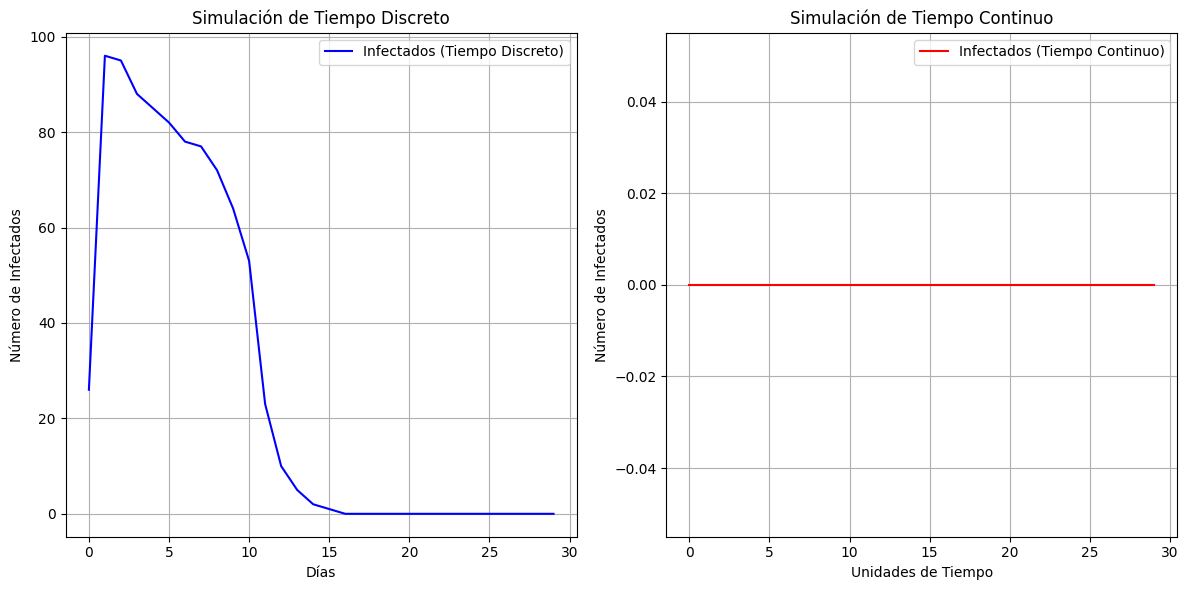

In [10]:
import random
import heapq
import matplotlib.pyplot as plt

# ---------------------- SIMULACIÓN DE TIEMPO DISCRETO ----------------------

# Arquitectura: Tiempo Discreto (Actualizaciones Diarias)
# En esta arquitectura, los eventos se actualizan en intervalos regulares (diarios). 
# Los pacientes se actualizan una vez por día, propagando la enfermedad y cambiando su estado (Saludable -> Infectado -> Recuperado/Muerto).

class Paciente:
    def __init__(self, estado, dias_infeccion):
        """
        Inicializa un paciente con su estado de salud y el número de días de infección.
        Atributos clave:
        - estado: Estado del paciente (Saludable, Infectado, Recuperado, Muerto)
        - dias_infeccion: Número de días que el paciente ha estado infectado.
        """
        self.estado = estado
        self.dias_infeccion = dias_infeccion

def propagacion_enfermedad(pacientes):
    """
    Propaga la enfermedad entre los pacientes. 
    Si un paciente está infectado, tiene una probabilidad de contagiar a otros pacientes saludables.
    Evento a monitorizar:
    - Propagación de la infección entre pacientes.
    """
    for paciente in pacientes:
        if paciente.estado == "Infectado":
            for otro_paciente in pacientes:
                if otro_paciente.estado == "Saludable" and random.random() < 0.3:
                    otro_paciente.estado = "Infectado"

def actualizar_estado(pacientes):
    """
    Actualiza el estado de salud de los pacientes.
    Si han estado infectados por cierto número de días, se recuperan o mueren.
    Evento a monitorizar:
    - Cambio de estado de los pacientes (Infectado -> Recuperado/Muerto).
    """
    for paciente in pacientes:
        if paciente.estado == "Infectado":
            paciente.dias_infeccion += 1
            if paciente.dias_infeccion > 10 and random.random() < 0.5:
                paciente.estado = "Recuperado"
            elif random.random() < 0.05:
                paciente.estado = "Muerto"

def simulacion_dia(pacientes):
    """
    Simula un día en la propagación de la enfermedad.
    Se actualizan los estados de los pacientes y se propaga la enfermedad.
    """
    propagacion_enfermedad(pacientes)
    actualizar_estado(pacientes)

# ---------------------- SIMULACIÓN DE TIEMPO CONTINUO ----------------------

# Arquitectura: Tiempo Continuo (Infecciones impulsadas por eventos)
# En esta arquitectura, los eventos pueden ocurrir en cualquier momento, según las interacciones entre los pacientes.
# La propagación de la enfermedad se basa en la proximidad de los pacientes y sus interacciones en tiempo continuo.

class PacienteContinuo:
    def __init__(self, estado, proximidad, tiempo_infeccion):
        """
        Inicializa un paciente con su estado de salud, proximidad a otros pacientes y tiempo de infección.
        Atributos clave:
        - estado: Estado del paciente (Saludable, Infectado, Recuperado, Muerto)
        - proximidad: Distancia con otros pacientes, importante para la propagación de la enfermedad.
        - tiempo_infeccion: El tiempo que el paciente ha estado infectado.
        """
        self.estado = estado
        self.proximidad = proximidad
        self.tiempo_infeccion = tiempo_infeccion

    def __lt__(self, other):
        """
        Implementación del operador menor que para permitir la comparación de los pacientes por proximidad.
        Esto es necesario para organizar a los pacientes según su cercanía.
        """
        return self.proximidad < other.proximidad

def evento_contagio(paciente1, paciente2):
    """
    Simula el evento de contagio entre dos pacientes si están suficientemente cerca.
    Evento a monitorizar:
    - Propagación de la enfermedad basada en la proximidad entre pacientes.
    """
    if paciente1.estado == "Infectado" and paciente2.estado == "Saludable":
        if random.random() < 0.1:
            paciente2.estado = "Infectado"

def actualizar_estado_continuo(pacientes):
    """
    Actualiza el estado de salud de los pacientes en tiempo continuo.
    Después de un tiempo, los pacientes se recuperan o mueren.
    Evento a monitorizar:
    - Cambio de estado (Infectado -> Recuperado/Muerto).
    """
    for paciente in pacientes:
        if paciente.estado == "Infectado":
            paciente.tiempo_infeccion += 1
            if paciente.tiempo_infeccion > 15:
                paciente.estado = "Recuperado"
            elif random.random() < 0.05:
                paciente.estado = "Muerto"

def simulacion_tiempo_continuo(pacientes):
    """
    Simula el comportamiento de los pacientes en tiempo continuo.
    Los pacientes interactúan entre sí en función de su proximidad.
    """
    heapq.heapify(pacientes)  # Organiza los pacientes en una estructura de prioridad (por proximidad)
    while pacientes:
        paciente = heapq.heappop(pacientes)
        for otro_paciente in pacientes:
            if abs(paciente.proximidad - otro_paciente.proximidad) < 5:
                evento_contagio(paciente, otro_paciente)
        actualizar_estado_continuo(pacientes)

# ---------------------- MAIN PARA SIMULACIONES ----------------------

def simulacion_discreta():
    """
    Ejecuta la simulación de tiempo discreto, donde se actualiza el estado de los pacientes a diario.
    Atributos clave del agente:
    - estado: El estado de cada paciente.
    - días de infección.
    
    Tipos de eventos a monitorizar:
    - Propagación de la enfermedad a lo largo del tiempo.
    - Cambios de estado (Infectado -> Recuperado/Muerto).
    """
    dias_simulacion = 30
    pacientes = [Paciente("Saludable", 0) for _ in range(99)]
    pacientes.append(Paciente("Infectado", 0))

    infectados_por_dia = []
    for dia in range(dias_simulacion):
        simulacion_dia(pacientes)
        infectados = sum(1 for p in pacientes if p.estado == 'Infectado')
        infectados_por_dia.append(infectados)

    return infectados_por_dia

def simulacion_continua():
    """
    Ejecuta la simulación de tiempo continuo, donde los pacientes interactúan continuamente y pueden contagiarse en cualquier momento.
    Atributos clave del agente:
    - estado: El estado de cada paciente.
    - proximidad: Distancia entre los pacientes.
    - tiempo de infección.
    
    Tipos de eventos a monitorizar:
    - Interacciones entre pacientes (contagio).
    - Cambios de estado (Infectado -> Recuperado/Muerto).
    """
    pacientes = [PacienteContinuo("Saludable", random.random()*10, 0) for _ in range(99)]
    pacientes.append(PacienteContinuo("Infectado", random.random()*10, 0))

    infectados_por_dia = []
    for _ in range(30):  # Simulamos por 30 unidades de tiempo
        simulacion_tiempo_continuo(pacientes)
        infectados = sum(1 for p in pacientes if p.estado == 'Infectado')
        infectados_por_dia.append(infectados)

    return infectados_por_dia

# Llamar a la simulación de tiempo discreto
infectados_discretos = simulacion_discreta()

# Llamar a la simulación de tiempo continuo
infectados_continuos = simulacion_continua()

# ---------------------------- GRAFICO ----------------------------

# Crear una figura y ejes
plt.figure(figsize=(12, 6))

# Graficar la simulación de tiempo discreto
plt.subplot(1, 2, 1)
plt.plot(infectados_discretos, label="Infectados (Tiempo Discreto)", color="b")
plt.title("Simulación de Tiempo Discreto")
plt.xlabel("Días")
plt.ylabel("Número de Infectados")
plt.grid(True)
plt.legend()

# Graficar la simulación de tiempo continuo
plt.subplot(1, 2, 2)
plt.plot(infectados_continuos, label="Infectados (Tiempo Continuo)", color="r")
plt.title("Simulación de Tiempo Continuo")
plt.xlabel("Unidades de Tiempo")
plt.ylabel("Número de Infectados")
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
